# Time Series Analysis

link:https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/#:~:text=The%20Holt%20Winter's%20Exponential%20Smoothing,trends%20and%20seasonality%20into%20accou

metrics link:https://machinelearningmastery.com/time-series-forecasting-performance-measures-with-python/

Time series analysis can be useful to see how a given asset, security, or economic variable changes over time. It can also be used to examine how the changes associated with the chosen data point compare to shifts in other variables over the same time period

While all the numerous advanced tools and techniques are employed for data analysis such as data science, business intelligence, NLP, classical and quantum machine learning, deep learning, implementation of Artificial Intelligence and IoT, one of the techniques frequently preferred for analyzing #financialdata is statistical Time Series Analysis.

#### models used for time series analysis
Broadly specified time-series models are Autoregressive (AR) Models, Integrated (I) models, Moving Average(MA) models, and some other models are the combination of these models such as Autoregressive Moving Average (ARMA) models, and Autoregressive Integrated Moving Average (ARIMA) models.

### Implementing Time Series Analysis in Machine Learning

There are multiple models and methods used as approaches for time series forecasting, let’s understand them more clearly

#### Methods

#### Univariate Time-series Forecasting method:

forecasting problems contain only two variables in which one is time and the other is the field we are looking to forecast. For example, if you want to predict the mean temperature of a city for the coming week, now one parameter is time( week) and the other is a city.

#### Multivariate Time-series Forecasting method:

forecasting problems contain multiple variables keeping one variable as time fixed and others will be multiple in parameters.

Consider the same example, predicting the temperature of a city for the coming week, the only difference would come here now temperature will consider impacting factors such as rainfall and time duration of raining, humidity, wind speed, precipitation, atmospheric pressure, etc, and then the temperature of the city will be predicted accordingly. All these factors are related to temperature and impact it vigorously.

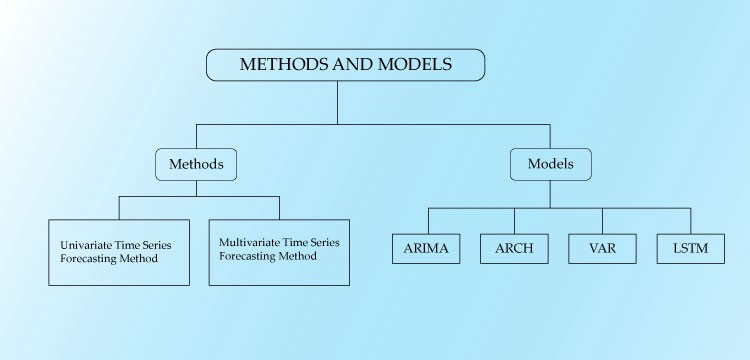

#### ARIMA Model:

As mentioned in the above section, it is a combination of three different models itself, AR, MA and I, where “AR” reflects the evolving variable of interest is regressed on its own prior values, “MA” infers that the regression error is the linear combination of error terms values happened at various stages of time priorly, and “I” shows the data values are replaced by the difference between their values and the previous values. Combinedly “ARIMA” tries to fit the data into the model, and also ARIMA depends on the accuracy over a broad width of time series.

#### ARCH/GARCH Model: 

Being the extended model of its common version GARCH, Autoregressive Conditional Heteroscedasticity (ARCH) is the most volatile model for time series forecasting, and are well trained for catching dynamic variations of volatility from time series.

#### Vector Autoregressive Model or VAR model: 

It gives the independencies between various time-series data which as a generalization of the Univariate Autoregression Model.

#### LSTM: Long-short term memory(LSTM) is a deep learning model,

it is a kind of Recurrent Neural Network(RNN) to read the sequence dependencies. It enables us to handle long structures during training the dataset and creates predictions according to previous data.

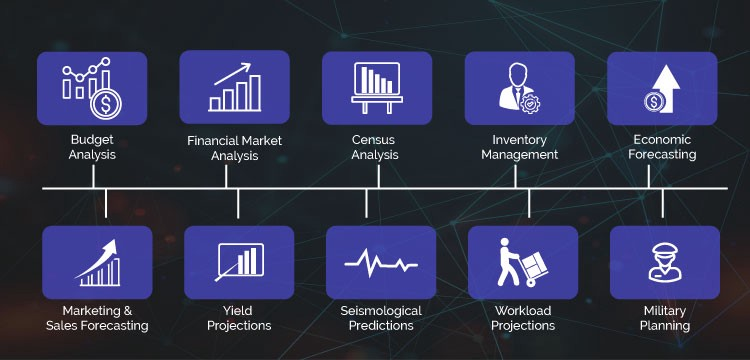

### Stationary Series

There are three basic criterion for a series to be classified as stationary series :

1. The mean of the series should not be a function of time rather should be a constant. The image below has the left hand graph satisfying the condition whereas the graph in red has a time dependent mean.

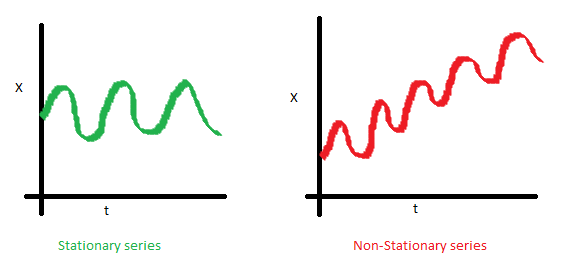

2. The variance of the series should not a be a function of time. This property is known as homoscedasticity. Following graph depicts what is and what is not a stationary series. (Notice the varying spread of distribution in the right hand graph)

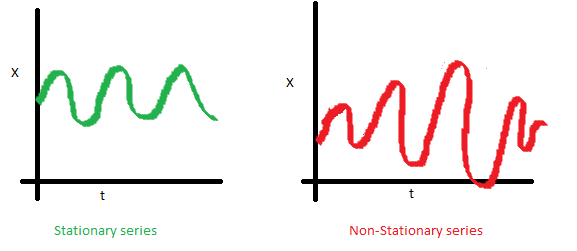

3. The covariance of the i th term and the (i + m) th term should not be a function of time. In the following graph, you will notice the spread becomes closer as the time increases. Hence, the covariance is not constant with time for the ‘red series’.

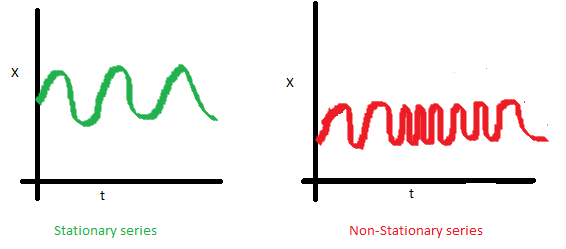

### ARIMA

ARIMA, short for ‘Auto Regressive Integrated Moving Average’ is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
d = pd.read_csv('monthly_sales.csv')

In [5]:
d.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
d=d.rename(columns={'Perrin Freres monthly champagne sales millions ?64-?72': 'sales'})

In [7]:
d.head()

,Month,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [8]:
d.isna().sum()

Month    1
sales    2
dtype: int64

In [9]:
d = d.dropna(how = 'any')

In [10]:
d.isna().sum()

Month    0
sales    0
dtype: int64

In [11]:
#convert month in to datetime
d['Month']=pd.to_datetime(d['Month'])

In [12]:
d.head()

,Month,sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [13]:
d.set_index('Month', inplace = True)

In [14]:
d.head()

,sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


<AxesSubplot:xlabel='Month'>

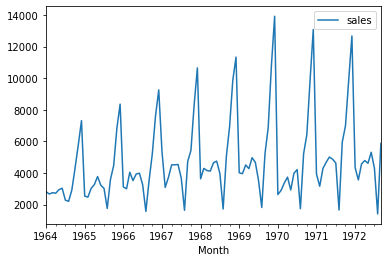

In [15]:
d.plot()

A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time. But why is it important? Most of the TS models work on the assumption that the TS is stationary. Intuitively, we can sat that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

constant mean
constant variance
an autocovariance that does not depend on time.

It is clearly evident that there is an overall increasing trend in the data along with some seasonal variations. However, it might not always be possible to make such visual inferences (we’ll see such cases later). So, more formally, we can check stationarity using the following:

Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.
Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. Refer this article for details.
These concepts might not sound very intuitive at this point. I recommend going through the prequel article. If you’re interested in some theoretical statistics, you can refer Introduction to Time Series and Forecasting by Brockwell and Davis. The book is a bit stats-heavy, but if you have the skill to read-between-lines, you can understand the concepts and tangentially touch the statistics.

In [16]:
# testing stationarity
from statsmodels.tsa.stattools import adfuller

In [17]:
# HO: it is non stationary
# H1: it is stationary

def adfuller_test(sales):
    
    result = adfuller(sales)
    labels = ['ADF Test Statistics', 'p-value', '#Lags used', 'Number of observations used']
    for value,label in zip(result, labels):
        print(label+":"+str(value))
    if result[1]<= 0.05:
        print('strong evidence against the null hypothesis(HO), rejecting the null hypothesis. data is stationary')
    else:
        print('weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary')
        

In [18]:
adfuller_test(d['sales'])

ADF Test Statistics:-1.8335930563276246
p-value:0.3639157716602442
#Lags used:11
Number of observations used:93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


### How to make a Time Series Stationary?
Though stationarity assumption is taken in many TS models, almost none of practical time series are stationary. So statisticians have figured out ways to make series stationary, which we’ll discuss now. Actually, its almost impossible to make a series perfectly stationary, but we try to take it as close as possible.

Lets understand what is making a TS non-stationary. There are 2 major reasons behind non-stationaruty of a TS:
1. Trend – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.
2. Seasonality – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.

The underlying principle is to model or estimate the trend and seasonality in the series and remove those from the series to get a stationary series. Then statistical forecasting techniques can be implemented on this series. The final step would be to convert the forecasted values into the original scale by applying trend and seasonality constraints back.

In this simpler case, it is easy to see a forward trend in the data. But its not very intuitive in presence of noise. So we can use some techniques to estimate or model this trend and then remove it from the series. There can be many ways of doing it and some of most commonly used are:

Aggregation – taking average for a time period like monthly/weekly averages
Smoothing – taking rolling averages
Polynomial Fitting – fit a regression model
I will discuss smoothing here and you should try other techniques as well which might work out for other problems. Smoothing refers to taking rolling estimates, i.e. considering the past few instances. There are can be various ways but I will discuss two of those here.

In [19]:
# if data is not stationary , 'differencing' used to make it stationary. in this we shift 1 position down
d['Sales First Difference'] = d['sales']-d['sales'].shift(1)


In [20]:
d['sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: sales, Length: 105, dtype: float64

In [21]:
d.head()

,sales,Sales First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [22]:
d['Sales First Difference'] = d['sales']-d['sales'].shift(12)# data has seasonal difference (1year=12 months)

In [23]:
d.head()

,sales,Sales First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN


In [24]:
# again test dickey fuller test
adfuller_test(d['Sales First Difference'].dropna())

ADF Test Statistics:-7.626619157213163
p-value:2.060579696813685e-11
#Lags used:0
Number of observations used:92
strong evidence against the null hypothesis(HO), rejecting the null hypothesis. data is stationary


<AxesSubplot:xlabel='Month'>

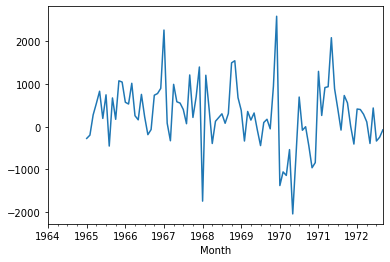

In [25]:
d['Sales First Difference'].plot()

link arima:https://towardsdatascience.com/significance-of-acf-and-pacf-plots-in-time-series-analysis-2fa11a5d10a8

### Forecasting a Time Series

We saw different techniques and all of them worked reasonably well for making the TS stationary. Lets make model on the TS after differencing as it is a very popular technique. Also, its relatively easier to add noise and seasonality back into predicted residuals in this case. Having performed the trend and seasonality estimation techniques, there can be two situations:

A strictly stationary series with no dependence among the values. This is the easy case wherein we can model the residuals as white noise. But this is very rare.
A series with significant dependence among values. In this case we need to use some statistical models like ARIMA to forecast the data.
Let me give you a brief introduction to ARIMA. I won’t go into the technical details but you should understand these concepts in detail if you wish to apply them more effectively. ARIMA stands for Auto-Regressive Integrated Moving Averages. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.
An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. Lets discuss them first.

Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).
Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

### Auto Regressive Model

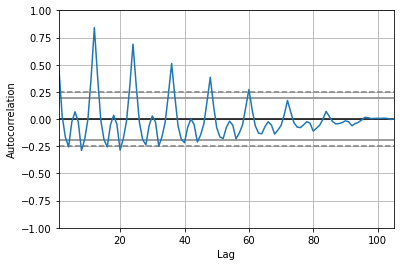

In [26]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(d['sales'])
plt.show()

In [40]:
import statsmodels.api as sm

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [42]:
from statsmodels.graphics import utils
from statsmodels.tsa.stattools import acf, pacf

TypeError: acf() got an unexpected keyword argument 'lags'

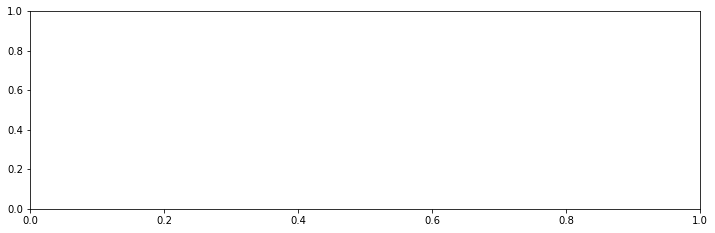

In [44]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = statsmodels.graphics.tsaplots.acf(d['Sales First Difference'].iloc[13:], lags=40, ax = ax1)# acf = auto correlation
ax2 =  fig.add_subplot(212)
fig = statsmodels.graphics.tsaplots.pcf(d['Sales First Difference'].iloc[13:], lags=40, ax = ax1)# pcf = partial auto correlation

In [84]:
import statsmodels.api as sm